In [1]:
rootpath = "../../../"

In [2]:
import subprocess
subprocess.run(rootpath + "bin/resolution")

CompletedProcess(args='../../../bin/resolution', returncode=0)

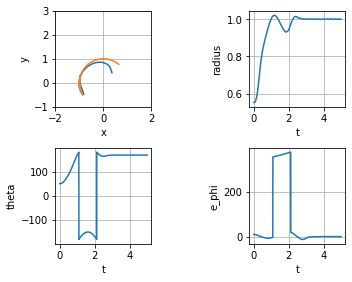

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

t = []
x = []
y = []
phi = []
r = []
dist = []
angle = []

with open("simulationTest.txt") as file:
    file.readline()
    for line in file:
        content = line.split(" ")
        t.append(float(content[0]))
        x.append(float(content[1]))
        y.append(float(content[2]))
        phi.append(float(content[3]))
        r.append(math.sqrt(float(content[1])*float(content[1])+float(content[2])*float(content[2])))
        dist.append(math.atan2(float(content[2]),float(content[1])))
        angle.append(float(content[3]) - math.atan2(float(content[2]),float(content[1])))
fig, ax = plt.subplots(2,2)
ax[0,0].plot(x, y)
ax[0,0].grid()
refX = []
refY = []
for [i,val] in enumerate(x):
  theta = (math.atan2(y[i],x[i]))
  refX.append(math.cos(theta))
  refY.append(math.sin(theta))
ax[0,0].plot(refX,refY)
ax[0,0].set_ylabel('y')
ax[0,0].set_xlabel('x')
ax[0,0].set_xlim([-2,2])
ax[0,0].set_ylim([-1,3])
ax[0,0].set_aspect('equal', 'box')

ax[0,1].plot(t,r)
ax[0,1].grid()
ax[0,1].set_ylabel('radius')
ax[0,1].set_xlabel('t')
x0,x1 = ax[0,1].get_xlim()
y0,y1 = ax[0,1].get_ylim()
ax[0,1].set_aspect(abs(x1-x0)/abs(y1-y0))

ax[1,0].plot(t,np.array(dist)*180.0/math.pi)
ax[1,0].grid()
ax[1,0].set_ylabel('theta')
ax[1,0].set_xlabel('t')
x0,x1 = ax[1,0].get_xlim()
y0,y1 = ax[1,0].get_ylim()
ax[1,0].set_aspect(abs(x1-x0)/abs(y1-y0))

ax[1,1].plot(t,np.array(angle)*180.0/math.pi)
ax[1,1].grid()
ax[1,1].set_ylabel('e_phi')
ax[1,1].set_xlabel('t')
x0,x1 = ax[1,1].get_xlim()
y0,y1 = ax[1,1].get_ylim()
ax[1,1].set_aspect(abs(x1-x0)/abs(y1-y0))
fig.tight_layout(pad=1)
plt.show()